# Bike Data Analysis
## Notes on the Data
- Start Station Id is always an int, although Start Station Name may be NULL. 
  - What does NULL mean? insertion from repair?
  - 28228 / 200_000 rides have null start station; also roughly 28225 / 200_000 rides have null name end station
    - Hypothesis: No valid Id | System Error
    - Notably, in Feb - June data, there are no NaN end stations (all integers) 
      - possibly, the data format has changed
  - How are repairs, temporary bike removal modeled in the data?
  - When are bikes typically repaired? / relocated?
- End Station Id may be nan. What does that mean?
  - Note: 95 Nan End stations in Jan 2024 of roughly 200_000 rides total.
  - 
  - Hypothesis: Manual repositioning / repairs | repositioning.
- Note: files have `cp1252` encoding
## Geospatial Analysis and Visualization
- Retrieve geospatial coordinates for the respective stations from the stations file or the current up-to-date station data from the other repo. (Check that ids match, otherwise match street names)
- 



In [9]:
import pandas as pd

# Load the CSV data into a DataFrame
file_path = '../data/bikeshare-ridership-2024/Bike share ridership 2024-05.csv'

ridership_table = pd.read_csv("../data/bikeshare-ridership-2024/Bike share ridership 2024-05.csv", encoding='cp1252')

# Display the first few rows of the DataFrame
ridership_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685782 entries, 0 to 685781
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Trip Id             685782 non-null  int64 
 1   Trip  Duration      685782 non-null  int64 
 2   Start Station Id    685782 non-null  int64 
 3   Start Time          685782 non-null  object
 4   Start Station Name  685748 non-null  object
 5   End Station Id      685782 non-null  int64 
 6   End Time            685782 non-null  object
 7   End Station Name    685744 non-null  object
 8   Bike Id             685782 non-null  int64 
 9   User Type           685782 non-null  object
 10  Model               685782 non-null  object
dtypes: int64(5), object(6)
memory usage: 57.6+ MB


In [4]:
ridership_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204870 entries, 0 to 204869
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ï»¿Trip Id          204870 non-null  int64  
 1   Trip  Duration      204870 non-null  int64  
 2   Start Station Id    204870 non-null  int64  
 3   Start Time          204870 non-null  object 
 4   Start Station Name  176657 non-null  object 
 5   End Station Id      204775 non-null  float64
 6   End Time            204870 non-null  object 
 7   End Station Name    176642 non-null  object 
 8   Bike Id             204870 non-null  int64  
 9   User Type           204870 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 15.6+ MB


In [14]:
import numpy as np
non_finite_values = [val for val in ridership_table['End Station Id'] if pd.isna(val) or not np.isfinite(val)]
null_values = [val for val in ridership_table['Start Station Name'] if type(val) == float and pd.isna(val)]
non_finite_values, len(non_finite_values)
len(null_values), null_values


(28213,
 [nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan

In [2]:
# Print the column headers of the bike_share_data DataFrame
print(ridership_table.columns)
row_names = ['Trip Id', 'Trip  Duration', 'Start Station Id', 'Start Time',
       'Start Station Name', 'End Station Id', 'End Time', 'End Station Name',
       'Bike Id', 'User Type']

Index(['Trip Id', 'Trip  Duration', 'Start Station Id', 'Start Time',
       'Start Station Name', 'End Station Id', 'End Time', 'End Station Name',
       'Bike Id', 'User Type'],
      dtype='object')


In [3]:
# get average trip duration
average_trip_duration_min = ridership_table['Trip  Duration'].mean() / 60
print(f"Average trip duration: {average_trip_duration_min:.2f} minutes")

Average trip duration: 14.61 minutes


In [18]:
if not 'an' in globals():
    import analysis as an
else:
    import importlib
    importlib.reload(an)

data = an.BikeShareData('2024-1')
data.load_data(ridership_table)
data.save_pickle()


def visualize_heatmap(t):
    pass
    # todo
    # (folium)
    # create map with all stations
    # color stations by difference between max(capacity and bikes(t), bikes(t))

ValueError: cannot convert float NaN to integer

In [5]:
bike_share_data = an.BikeShareData.load_from_pickle('2024-1')
#bike_share_data.load_data(ridership_table)
bike_share_data.save_pickle()

In [13]:
data.stations.keys()

dict_keys([7041, 7130.0, 7245, 7259.0, 7052, 7366.0, 7418.0, 7721, 7253, 7788, 7686.0, 7391, 7163.0, 7324, 7009.0, 7827, 7104.0, 7048, 7576.0, 7467, 7534.0, 7105, 7302, 7152.0, 7032.0, 7821, 7656.0, 7411, 7225.0, 7153, 7151.0, 7089, 7033.0, 7881, nan, 7724, 7013, 7344.0, 7261, 7911.0, 7364.0, 7291, 7453.0, 7810, 7815.0, 7099.0, 7043, 7244.0, 7164.0, 7076, 7430.0, 7189, 7476, 7231.0, 7770, 7102.0, 7226, 7557.0, 7157, 7422.0, 7398, 7452.0, 7542, 7298.0, 7354, 7445.0, 7474, 7073.0, 7028.0, 7720, 7207.0, 7100.0, 7492.0, 7569, 7691, 7527.0, 7469, 7030.0, 7005.0, 7432.0, 7340, 7103.0, 7284.0, 7475, 7816, 7389.0, 7506.0, 7039.0, 7458, 7718.0, 7199, 7205.0, 7050, 7796.0, 7287, 7717.0, 7257, 7263.0, 7059, 7006.0, 7203, 7902.0, 7341.0, 7069.0, 7283, 7196.0, 7772, 7320, 7386.0, 7684, 7101, 7685, 7375, 7055.0, 7077.0, 7020, 7190.0, 7647.0, 7385, 7548.0, 7798.0, 7022, 7139.0, 7001, 7008.0, 7053, 7160.0, 7917, 7502.0, 7272, 7012.0, 7119.0, 7074, 7409.0, 7493, 7045, 7169, 7246.0, 7682.0, 7794, 7533.0

In [38]:
import numpy as np

def argmax(dict):
    return max(dict.keys(), key = lambda x: dict[x])

data.stations.keys()
ind = argmax({key: station.capacity for key, station in data.stations.items()})

print("ind: ", ind)
max_cap_station = data.stations[ind]
max_cap_station

ind:  7041


BikeStation(station_id=7041, name='Edward St / Yonge St', lat=nan, lon=nan, capacity=-1, num_bikes_t0=0, num_bikes=SparseSequence([(Timestamp('2024-01-01 00:00:00'), 0), (Timestamp('2024-01-01 00:00:00'), -1), (Timestamp('2024-01-01 00:03:00'), -2)]))

Text(0.5, 1.0, 'Distribution of Trip Durations')

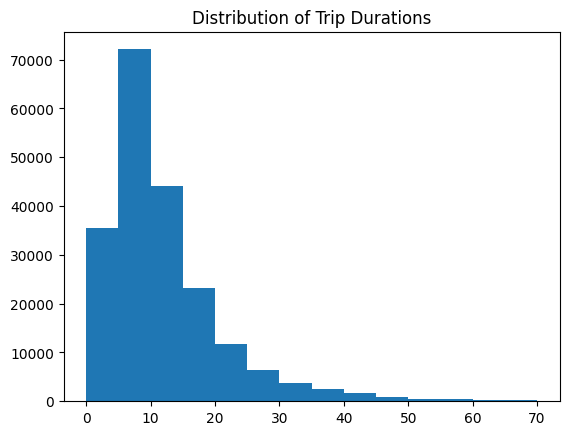

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Create a histogram of the trip durations
plt.hist(ridership_table['Trip  Duration'] / 60, bins=range(0, 75, 5))
plt.title('Distribution of Trip Durations')

In [8]:
one_station = bike_share_data.stations[list(bike_share_data.stations.keys())[0]]
print(one_station)
print(one_station.num_bikes)

BikeStation(station_id=7041, name='Edward St / Yonge St', lat=nan, lon=nan, capacity=np.int64(84), num_bikes_t0=np.int64(7), num_bikes=<analysis.SparseSequence object at 0x76a38298a4e0>)
